<a href="https://colab.research.google.com/github/Yamito548/proyecto_final_flores/blob/main/proyecto_yolo_final_de_curso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Enlace](https://drive.google.com/drive/folders/19BwPQYdQROKqQ0G4A7lYjozePm-9dWtE?usp=sharing) al dataset y archivo conf2.yaml:

# Comprobar si hay GPU

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-9b8b2878-f797-2798-dfef-efb80c66058e)


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [4]:
import tensorflow as tf
import timeit
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
    '\n\nThis error most likely means that this notebook is not '
    'configured to use a GPU. Change this in Notebook Settings via the '
    'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')
def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)
def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()
# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
  '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
11.302199157000004
GPU (s):
0.192799167000004
GPU speedup over CPU: 58x


# Montar drive

In [5]:
from google.colab import drive
#Donde se encuentren tu dataset, también se podría usar cong github.
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!pip install ultralytics
from ultralytics import YOLO
from IPython.display import display, Image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.2/757.2 kB 4.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [7]:
from ultralytics import YOLO
# Carga un modelo YOLOv8n preentrenado en COCO
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 73.6MB/s]


# Entrenamiento del modelo

In [8]:
# Entrena el modelo utilizando el conjunto de datos especificado en config2.yaml durante 80 épocas
model.train(data='/content/drive/MyDrive/proyecto_fin_de_curso/flores/config2.yaml' ,epochs=80, imgsz=1024)

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/proyecto_fin_de_curso/flores/config2.yaml, epochs=80, time=None, patience=100, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, 

100%|██████████| 755k/755k [00:00<00:00, 15.2MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 22        [15, 18, 21]  1    751702  ultralytics.nn.modules.head.Detect           [2, [64, 128, 256]]           
Model summary: 225 layers, 3011238 parameters, 3011222 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir runs/detect/train', view at http://localhost:6006/
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/proyecto_fin_de_curso/flores/labels/train.cache... 166 images, 56 backgrounds, 0 corrupt: 100%|██████████| 222/222 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/proyecto_fin_de_curso/flores/labels/train.cache... 166 images, 56 backgrounds, 0 corrupt: 100%|██████████| 222/222 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 80 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/80      6.23G      1.772      4.236      2.386         41       1024: 100%|██████████| 14/14 [00:17<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.19s/it]

                   all        222        241     0.0032       0.87      0.203     0.0613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/80      5.57G      1.498      3.586      2.203         22       1024: 100%|██████████| 14/14 [00:09<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.27s/it]

                   all        222        241    0.00986      0.839      0.236     0.0986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/80      5.67G      1.468      3.208      2.056         23       1024: 100%|██████████| 14/14 [00:10<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.44s/it]

                   all        222        241    0.00346      0.886      0.362      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/80      5.53G      1.431      2.926      2.056         35       1024: 100%|██████████| 14/14 [00:12<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.20s/it]

                   all        222        241      0.573      0.343      0.452      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/80      5.54G      1.498      2.951      2.125         43       1024: 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:09<00:00,  1.31s/it]

                   all        222        241      0.674      0.152      0.159     0.0599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/80      5.61G      1.477      2.808      2.093         38       1024: 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.15s/it]

                   all        222        241      0.405      0.384      0.311     0.0882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/80      5.58G      1.503      2.708      2.055         23       1024: 100%|██████████| 14/14 [00:07<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.03it/s]

                   all        222        241      0.181       0.36       0.15      0.049



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/80      5.53G      1.434      2.561      2.044         26       1024: 100%|██████████| 14/14 [00:08<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]

                   all        222        241      0.383      0.477      0.354      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/80      5.54G      1.443      2.492      2.024         42       1024: 100%|██████████| 14/14 [00:11<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]

                   all        222        241      0.395      0.314      0.281     0.0997



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/80      5.57G      1.429      2.355      2.021         42       1024: 100%|██████████| 14/14 [00:10<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]

                   all        222        241      0.336      0.403      0.291     0.0856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/80      5.58G       1.53      2.316      2.071         34       1024: 100%|██████████| 14/14 [00:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.07s/it]

                   all        222        241      0.538      0.514       0.51      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/80      5.63G      1.423      2.225      1.977         38       1024: 100%|██████████| 14/14 [00:07<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.02s/it]

                   all        222        241      0.445      0.527      0.443      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/80      5.57G      1.441      2.168      2.026         39       1024: 100%|██████████| 14/14 [00:07<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]

                   all        222        241      0.512      0.539      0.488      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/80      5.53G      1.409      2.038      1.981         28       1024: 100%|██████████| 14/14 [00:10<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]

                   all        222        241      0.613      0.473      0.486      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/80      5.62G      1.393      2.031      1.964         35       1024: 100%|██████████| 14/14 [00:10<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]

                   all        222        241      0.523      0.467      0.436      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/80      5.61G      1.373      1.856      1.958         21       1024: 100%|██████████| 14/14 [00:08<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.06s/it]

                   all        222        241      0.538      0.531      0.472      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/80      5.58G      1.304      1.888      1.939         37       1024: 100%|██████████| 14/14 [00:07<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]

                   all        222        241      0.653      0.615      0.613      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/80      5.57G      1.378       1.88      1.925         33       1024: 100%|██████████| 14/14 [00:07<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.42it/s]

                   all        222        241      0.649      0.684      0.684      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/80      5.57G      1.297      1.712       1.85         34       1024: 100%|██████████| 14/14 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.43it/s]

                   all        222        241      0.604      0.692      0.635      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/80      5.53G      1.291        1.7      1.881         23       1024: 100%|██████████| 14/14 [00:11<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.49it/s]

                   all        222        241      0.557      0.653      0.637      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/80      5.58G      1.388      1.862      1.936         25       1024: 100%|██████████| 14/14 [00:08<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]

                   all        222        241      0.466      0.625      0.581      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/80      5.57G      1.318      1.835      1.974         26       1024: 100%|██████████| 14/14 [00:07<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


                   all        222        241      0.455      0.641      0.556       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/80      5.57G      1.355       1.71      1.945         39       1024: 100%|██████████| 14/14 [00:08<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]

                   all        222        241      0.596      0.599       0.59      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/80      5.53G      1.254      1.613      1.856         41       1024: 100%|██████████| 14/14 [00:10<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]

                   all        222        241      0.688      0.655      0.704      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/80      5.58G      1.306      1.487      1.857         28       1024: 100%|██████████| 14/14 [00:10<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]

                   all        222        241      0.646      0.661      0.671      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/80      5.56G      1.265      1.453      1.863         29       1024: 100%|██████████| 14/14 [00:08<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.02s/it]


                   all        222        241      0.634      0.605      0.624      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/80      5.58G      1.298      1.434      1.853         38       1024: 100%|██████████| 14/14 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]

                   all        222        241      0.627      0.729      0.695      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/80      5.53G       1.29      1.435      1.849         40       1024: 100%|██████████| 14/14 [00:08<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        222        241       0.62      0.751      0.706       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/80      5.54G      1.278      1.391      1.849         31       1024: 100%|██████████| 14/14 [00:11<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.50it/s]

                   all        222        241      0.658      0.734      0.719      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/80      5.57G      1.259      1.438      1.795         29       1024: 100%|██████████| 14/14 [00:10<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]

                   all        222        241      0.585      0.719      0.644      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/80      5.57G      1.277      1.442      1.802         57       1024: 100%|██████████| 14/14 [00:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.04s/it]

                   all        222        241      0.718      0.743      0.737       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/80      5.57G      1.187      1.309        1.8         29       1024: 100%|██████████| 14/14 [00:07<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]

                   all        222        241      0.706      0.842      0.776       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/80      5.57G      1.181      1.257       1.78         31       1024: 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]

                   all        222        241      0.739      0.807       0.79      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/80      5.57G       1.29      1.366       1.82         28       1024: 100%|██████████| 14/14 [00:11<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]

                   all        222        241      0.688      0.792      0.772      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/80      5.57G      1.232      1.318      1.749         32       1024: 100%|██████████| 14/14 [00:12<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]

                   all        222        241      0.672      0.862      0.795      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/80      5.53G      1.147      1.211      1.747         48       1024: 100%|██████████| 14/14 [00:09<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.01it/s]

                   all        222        241      0.677      0.838       0.79      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/80      5.61G      1.114      1.196      1.727         38       1024: 100%|██████████| 14/14 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.03it/s]

                   all        222        241        0.7      0.784      0.739      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/80      5.56G      1.233      1.316      1.755         31       1024: 100%|██████████| 14/14 [00:07<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]

                   all        222        241      0.733      0.852      0.832      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/80      5.61G      1.145      1.273      1.679         20       1024: 100%|██████████| 14/14 [00:10<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.51it/s]

                   all        222        241      0.696      0.827      0.779      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/80      5.53G      1.113       1.22      1.742         29       1024: 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]

                   all        222        241      0.746      0.853      0.805      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/80      5.58G      1.161      1.167      1.714         26       1024: 100%|██████████| 14/14 [00:09<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.02s/it]

                   all        222        241      0.754      0.868      0.812      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/80      5.53G      1.113      1.146      1.703         45       1024: 100%|██████████| 14/14 [00:08<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]

                   all        222        241      0.717      0.861      0.798      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/80      5.53G      1.115      1.092      1.634         39       1024: 100%|██████████| 14/14 [00:08<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.26it/s]

                   all        222        241      0.738      0.867      0.814      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/80      5.57G      1.147      1.161      1.679         31       1024: 100%|██████████| 14/14 [00:10<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.45it/s]

                   all        222        241      0.726      0.879       0.82      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/80      5.58G      1.153      1.189      1.748         30       1024: 100%|██████████| 14/14 [00:11<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.26it/s]

                   all        222        241      0.729      0.902      0.841      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/80      5.53G      1.178       1.25      1.738         21       1024: 100%|██████████| 14/14 [00:08<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.02it/s]

                   all        222        241      0.722      0.904      0.856      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/80      5.54G      1.114      1.109      1.666         25       1024: 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]

                   all        222        241      0.745      0.888      0.844      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/80      5.53G      1.135      1.102      1.675         32       1024: 100%|██████████| 14/14 [00:08<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]

                   all        222        241      0.741       0.92      0.871      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/80      5.57G      1.061      1.072      1.642         32       1024: 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.32it/s]

                   all        222        241      0.755      0.905      0.861      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/80      5.57G      1.115      1.154      1.655         30       1024: 100%|██████████| 14/14 [00:11<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.40it/s]

                   all        222        241      0.753      0.896      0.848      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/80      5.53G      1.084      1.085      1.649         40       1024: 100%|██████████| 14/14 [00:09<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]

                   all        222        241      0.738      0.915      0.845      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/80      5.53G      1.055      1.084      1.624         33       1024: 100%|██████████| 14/14 [00:07<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]

                   all        222        241      0.744        0.9      0.867      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/80      5.54G      1.058      1.061      1.645         39       1024: 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.30it/s]

                   all        222        241      0.768        0.9      0.871      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/80      5.56G      1.009      0.979      1.572         35       1024: 100%|██████████| 14/14 [00:10<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]

                   all        222        241      0.757      0.939       0.89      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/80      5.53G      1.031      1.015      1.595         29       1024: 100%|██████████| 14/14 [00:11<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.48it/s]

                   all        222        241      0.736      0.938      0.881        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/80      5.56G      1.026     0.9984      1.549         43       1024: 100%|██████████| 14/14 [00:08<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.10s/it]

                   all        222        241      0.766      0.953      0.885      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/80      5.57G     0.9858      1.013       1.58         23       1024: 100%|██████████| 14/14 [00:07<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]

                   all        222        241      0.778      0.957      0.887      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/80      5.53G      1.023     0.9887      1.557         35       1024: 100%|██████████| 14/14 [00:09<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.35it/s]

                   all        222        241      0.761      0.943      0.887      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/80      5.53G      1.012       1.03      1.547         34       1024: 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]

                   all        222        241      0.808      0.855      0.864      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/80      5.53G     0.9952     0.9662      1.548         33       1024: 100%|██████████| 14/14 [00:10<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.41it/s]

                   all        222        241      0.789      0.889      0.869      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/80      5.53G     0.9879     0.9874      1.541         32       1024: 100%|██████████| 14/14 [00:09<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]

                   all        222        241      0.797      0.886       0.88      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/80      5.65G     0.9357     0.9153      1.538         28       1024: 100%|██████████| 14/14 [00:08<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.00s/it]

                   all        222        241      0.761      0.937      0.877      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/80      5.57G     0.9524     0.9158       1.53         35       1024: 100%|██████████| 14/14 [00:07<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.41it/s]

                   all        222        241       0.78      0.932      0.892      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/80      5.57G     0.9032     0.8877      1.462         27       1024: 100%|██████████| 14/14 [00:10<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]

                   all        222        241      0.796      0.922      0.892       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/80      5.57G     0.9566     0.9304      1.479         29       1024: 100%|██████████| 14/14 [00:11<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]

                   all        222        241      0.775      0.968      0.898      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/80       5.6G     0.9483     0.9725      1.507         34       1024: 100%|██████████| 14/14 [00:09<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]

                   all        222        241      0.772      0.969      0.911      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/80      5.53G     0.9502     0.9342      1.561         27       1024: 100%|██████████| 14/14 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]

                   all        222        241      0.795      0.961      0.922      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/80      5.57G     0.9589     0.9283      1.525         42       1024: 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.45it/s]

                   all        222        241        0.8      0.984      0.922      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/80      5.53G     0.8792     0.8822      1.473         30       1024: 100%|██████████| 14/14 [00:10<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.50it/s]

                   all        222        241      0.809      0.939       0.92      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/80       5.6G     0.9033     0.9325      1.511         26       1024: 100%|██████████| 14/14 [00:10<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.30it/s]

                   all        222        241      0.819      0.936      0.921      0.704


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/80      5.54G      1.109      1.132      1.661         19       1024: 100%|██████████| 14/14 [00:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.25it/s]

                   all        222        241      0.818       0.95      0.926      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/80      5.57G      1.002     0.9478      1.589         19       1024: 100%|██████████| 14/14 [00:06<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.02s/it]

                   all        222        241      0.815      0.976      0.921      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/80      5.53G     0.9106     0.9369      1.498         11       1024: 100%|██████████| 14/14 [00:06<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.48it/s]

                   all        222        241      0.831      0.938      0.922      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/80      5.54G     0.8972     0.8948      1.532         15       1024: 100%|██████████| 14/14 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        222        241      0.854      0.956      0.939      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/80      5.58G     0.8847     0.8904       1.54         10       1024: 100%|██████████| 14/14 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]

                   all        222        241      0.856      0.957      0.946      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/80      5.53G     0.8999     0.8911      1.478         12       1024: 100%|██████████| 14/14 [00:06<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.03s/it]

                   all        222        241      0.852      0.951      0.945      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/80      5.54G     0.8729     0.8619      1.509         23       1024: 100%|██████████| 14/14 [00:06<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.45it/s]

                   all        222        241      0.864      0.933      0.949      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/80      5.57G      0.854      0.873      1.486         19       1024: 100%|██████████| 14/14 [00:09<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        222        241      0.845      0.957      0.952      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/80      5.54G     0.8113     0.7636      1.409         16       1024: 100%|██████████| 14/14 [00:09<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.39it/s]

                   all        222        241      0.847      0.962      0.952      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/80      5.54G     0.8069     0.7892      1.376         13       1024: 100%|██████████| 14/14 [00:06<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]

                   all        222        241      0.849       0.96      0.954       0.77



80 epochs completed in 0.378 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.07s/it]


                   all        222        241      0.849       0.96      0.954      0.771
                 rosas        222        113      0.866      0.991      0.968        0.8
             girasoles        222        128      0.832       0.93       0.94      0.742
Speed: 0.8ms preprocess, 6.0ms inference, 0.0ms loss, 6.5ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7805044f07c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

el archivo best.pt se genera de forma automática, tuve que estar búscandolo un buen rato hasta que encontré la ruta en donde estan todos.

# Visualización de los resultados

In [9]:
import cv2
from ultralytics import YOLO
import numpy as np
# Cargar el modelo YOLO preentrenado
model = YOLO("/content/runs/detect/train/weights/best.pt")
# Realizar la predicción en una imagen
results = model("/content/drive/MyDrive/proyecto_fin_de_curso/pruebas_mias/test_sunflower/7787905294_c35d5e0005_c.jpg", conf=0.3,
iou=0.3)


image 1/1 /content/drive/MyDrive/proyecto_fin_de_curso/pruebas_mias/test_sunflower/7787905294_c35d5e0005_c.jpg: 1024x1024 1 girasoles, 12.9ms
Speed: 5.0ms preprocess, 12.9ms inference, 1.8ms postprocess per image at shape (1, 3, 1024, 1024)


Box: tensor([ 33.9161,   9.4728, 217.2853, 239.9620], device='cuda:0')


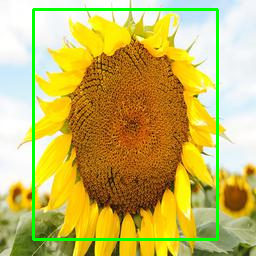

In [10]:
from google.colab.patches import cv2_imshow
import cv2

# Iterar sobre cada resultado en la lista
for result in results:
    # Obtener las coordenadas de los bounding boxes
    boxes = result.boxes[0].xyxy
    # Obtener el diccionario de nombres de clases
    names_dict = result.names
    # Cargar la imagen
    image = cv2.imread("/content/drive/MyDrive/proyecto_fin_de_curso/pruebas_mias/test_sunflower/7787905294_c35d5e0005_c.jpg")
    # Dibujar los bounding boxes en la imagen
    for box in boxes:
        print("Box:", box) # Imprimir el contenido de box
        xmin, ymin, xmax, ymax = box[:4] # Obtener las coordenadas del bounding box
        xmin, ymin, xmax, ymax = int(xmin), int(ymin), int(xmax), int(ymax)
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0,255,0), 2)

# Mostrar la imagen utilizando cv2_imshow
cv2_imshow(image)